In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, ks_2samp, ttest_rel, ranksums, mannwhitneyu, wilcoxon, kruskal, median_test

In [2]:
plt.style.use("/home/ms7490/scratch/code/scratch/matplotlib/clean.mplstyle")

In [3]:
machine_precision = np.finfo(np.float64).eps

# Porg plot

In [22]:
plot_data = pd.read_csv('./data/borg_experiment_data_events.csv', index_col=0)

In [23]:
ttest_ind(plot_data.query('variable == "num_exon_inclusion_skipping" & high_borg_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion_skipping" & ~high_borg_activation')['value'])

Ttest_indResult(statistic=1.3339052752969371, pvalue=0.18223648600171236)

In [24]:
ttest_ind(plot_data.query('variable == "num_exon_inclusion" & high_borg_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion" & ~high_borg_activation')['value'])

Ttest_indResult(statistic=-71.36364921638456, pvalue=0.0)

In [25]:
pvalue = ttest_ind(plot_data.query('variable == "num_exon_skipping" & high_borg_activation')['value'],
          plot_data.query('variable == "num_exon_skipping" & ~high_borg_activation')['value'])
pvalue

Ttest_indResult(statistic=84.4188898947244, pvalue=0.0)

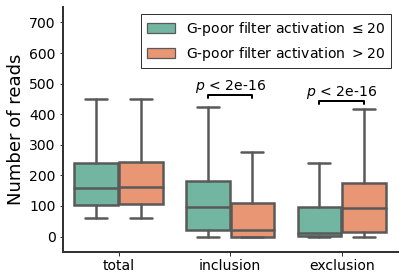

In [26]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.boxplot(x="variable", y="value", hue="high_borg_activation",
                    data=plot_data, palette="Set2", showfliers=False, linewidth=2.5, ax=ax)
ax.set_xticks(range(3))
ax.set_xticklabels(['total', 'inclusion', 'exclusion'])
ax.set_xlabel('')

ax.set_ylim(-50, 750)
ax.legend(ncol=1)
ax.set_ylabel('Number of reads')
ax.legend_.set_title('')
for text in ax.legend_.texts:
    if (text.get_text() == 'False'): text.set_text('G-poor filter activation $\leq 20$')
    if (text.get_text() == 'True'): text.set_text('G-poor filter activation $> 20$')
        

props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':2}
# f'$p$ < {machine_precision:.2e}'
ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(2, 470), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 400
ax.annotate('', xy=(2-barwidth,arrowheight), xytext=(2+barwidth, arrowheight), arrowprops=props)


ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(1, 490), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 420
ax.annotate('', xy=(1-barwidth,arrowheight), xytext=(1+barwidth, arrowheight), arrowprops=props)

        
fig.savefig('./figs/borg_experiment_data_events.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')

# Structure plot

In [44]:
plot_data = pd.read_csv('./data/structure_experiment_data_events.csv', index_col=0)

In [45]:
total_weak = plot_data.query('variable == "num_exon_inclusion_skipping" & high_structure_activation')['value'].values
total_strong = plot_data.query('variable == "num_exon_inclusion_skipping" & ~high_structure_activation')['value'].values

In [74]:
median_test(total_weak, total_strong, correction=True)

(8.613409957390141,
 0.0033369697628937273,
 159.0,
 array([[ 1262, 94524],
        [ 1122, 94938]]))

In [69]:
kruskal(total_weak, total_strong)

KruskalResult(statistic=15.48223434858717, pvalue=8.328436269151165e-05)

In [50]:
ks_2samp(plot_data.query('variable == "num_exon_inclusion_skipping" & high_structure_activation')['value'],
         plot_data.query('variable == "num_exon_inclusion_skipping" & ~high_structure_activation')['value'], mode='asymp', alternative='two-sided')

KstestResult(statistic=0.04279098679206028, pvalue=0.00034958538371651193)

In [51]:
pvalue = ks_2samp(plot_data.query('variable == "num_exon_skipping" & high_structure_activation')['value'],
          plot_data.query('variable == "num_exon_skipping" & ~high_structure_activation')['value'])
pvalue

KstestResult(statistic=0.1899281488969225, pvalue=7.820959919443553e-75)

In [52]:
pvalue = ks_2samp(plot_data.query('variable == "num_exon_inclusion" & high_structure_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion" & ~high_structure_activation')['value'])
pvalue

KstestResult(statistic=0.16382988542123406, pvalue=1.1149385647299577e-55)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


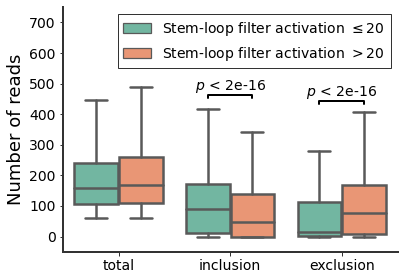

In [53]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.boxplot(x="variable", y="value", hue="high_structure_activation",
                    data=plot_data, palette="Set2", showfliers=False, linewidth=2.5, ax=ax)
ax.set_xticks(range(3))
ax.set_xticklabels(['total', 'inclusion', 'exclusion'])
ax.set_xlabel('')

ax.set_ylim(-50, 750)
ax.legend(ncol=1)
ax.set_ylabel('Number of reads')
ax.legend_.set_title('')
for text in ax.legend_.texts:
    if (text.get_text() == 'False'): text.set_text('Stem-loop filter activation $\leq 20$')
    if (text.get_text() == 'True'): text.set_text('Stem-loop filter activation $> 20$')
        
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':2}
# f'$p$ < {machine_precision:.2e}'
ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(2, 470), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 400
ax.annotate('', xy=(2-barwidth,arrowheight), xytext=(2+barwidth, arrowheight), arrowprops=props)

ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(1, 490), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 420
ax.annotate('', xy=(1-barwidth,arrowheight), xytext=(1+barwidth, arrowheight), arrowprops=props)

        
fig.savefig('./figs/structure_experiment_data_events.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')

In [67]:
plot_data.query('variable == "num_exon_inclusion_skipping" & ~high_structure_activation')['value'].median()

159.0

In [54]:
np.median(total_weak), np.median(total_strong)

(169.0, 159.0)

In [55]:
np.mean(total_weak), np.mean(total_strong)

(203.26929530201343, 190.05594261646135)